<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.132071,27.387213,48.335611,82.438755,144.097865,401.391515,526.550715,-125.159200
1,0.0,1.0,69.963459,20.679929,21.005186,41.490735,-8.536835,154.602474,203.599949,-48.997475
2,0.0,2.0,56.296783,32.490468,21.415193,94.141211,-368.105105,-153.761449,629.790285,-783.551734
3,0.0,3.0,68.538864,58.186915,21.320920,54.840443,462.782164,675.669306,509.094225,166.575081
4,0.0,4.0,97.214844,41.860932,77.863995,48.708736,392.706508,668.355015,266.175296,402.179719
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,72.974203,82.716999,27.813912,22.125471,-1451.028304,-1235.397718,-115.666064,-1119.731654
59996,999.0,56.0,20.690287,24.460036,64.081846,86.828957,73.817026,279.878152,217.609053,62.269098
59997,999.0,57.0,57.328265,45.213405,39.657009,93.827295,403.331667,649.357641,553.369697,95.987944
59998,999.0,58.0,61.419152,36.596176,88.757596,76.350857,293.707277,566.831057,353.734841,213.096217


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    89.132071  27.387213  48.335611  82.438755   144.097865   
      1.0    69.963459  20.679929  21.005186  41.490735    -8.536835   
      2.0    56.296783  32.490468  21.415193  94.141211  -368.105105   
      3.0    68.538864  58.186915  21.320920  54.840443   462.782164   
      4.0    97.214844  41.860932  77.863995  48.708736   392.706508   
...                ...        ...        ...        ...          ...   
999.0 55.0   72.974203  82.716999  27.813912  22.125471 -1451.028304   
      56.0   20.690287  24.460036  64.081846  86.828957    73.817026   
      57.0   57.328265  45.213405  39.657009  93.827295   403.331667   
      58.0   61.419152  36.596176  88.757596  76.350857   293.707277   
      59.0   72.749718  55.221031  67.284062  80.183020   512.039665   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     401.391515  526.550715  -125.159200  
      1.0     154.602474  203.599949   -48.997475  
      2.0    -153.761449  629.790285  -783.551734  
      3.0     675.669306  509.094225   166.575081  
      4.0     668.355015  266.175296   402.179719  
...                  ...         ...          ...  
999.0 55.0  -1235.397718 -115.666064 -1119.731654  
      56.0    279.878152  217.609053    62.269098  
      57.0    649.357641  553.369697    95.987944  
      58.0    566.831057  353.734841   213.096217  
      59.0    797.477497  438.663364   358.814133  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    89.132071  27.387213  48.335611  82.438755   144.097865   
      1.0    69.963459  20.679929  21.005186  41.490735    -8.536835   
      2.0    56.296783  32.490468  21.415193  94.141211  -368.105105   
      3.0    68.538864  58.186915  21.320920  54.840443   462.782164   
      4.0    97.214844  41.860932  77.863995  48.708736   392.706508   
...                ...        ...        ...        ...          ...   
999.0 55.0   72.974203  82.716999  27.813912  22.125471 -1451.028304   
      56.0   20.690287  24.460036  64.081846  86.828957    73.817026   
      57.0   57.328265  45.213405  39.657009  93.827295   403.331667   
      58.0   61.419152  36.596176  88.757596  76.350857   293.707277   
      59.0   72.749718  55.221031  67.284062  80.183020   512.039665   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     401.391515  526.550715  -125.159200  
      1.0     154.602474  203.599949   -48.997475  
      2.0    -153.761449  629.790285  -783.551734  
      3.0     675.669306  509.094225   166.575081  
      4.0     668.355015  266.175296   402.179719  
...                  ...         ...          ...  
999.0 55.0  -1235.397718 -115.666064 -1119.731654  
      56.0    279.878152  217.609053    62.269098  
      57.0    649.357641  553.369697    95.987944  
      58.0    566.831057  353.734841   213.096217  
      59.0    797.477497  438.663364   358.814133  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,89.132071,27.387213,48.335611,82.438755,144.097865,401.391515,526.550715,-125.159200
1,0.0,1.0,69.963459,20.679929,21.005186,41.490735,-8.536835,154.602474,203.599949,-48.997475
2,0.0,2.0,56.296783,32.490468,21.415193,94.141211,-368.105105,-153.761449,629.790285,-783.551734
3,0.0,3.0,68.538864,58.186915,21.320920,54.840443,462.782164,675.669306,509.094225,166.575081
4,0.0,4.0,97.214844,41.860932,77.863995,48.708736,392.706508,668.355015,266.175296,402.179719
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,72.974203,82.716999,27.813912,22.125471,-1451.028304,-1235.397718,-115.666064,-1119.731654
59996,999.0,56.0,20.690287,24.460036,64.081846,86.828957,73.817026,279.878152,217.609053,62.269098
59997,999.0,57.0,57.328265,45.213405,39.657009,93.827295,403.331667,649.357641,553.369697,95.987944
59998,999.0,58.0,61.419152,36.596176,88.757596,76.350857,293.707277,566.831057,353.734841,213.096217


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    89.132071  27.387213  48.335611  82.438755   144.097865   
      1.0    69.963459  20.679929  21.005186  41.490735    -8.536835   
      2.0    56.296783  32.490468  21.415193  94.141211  -368.105105   
      3.0    68.538864  58.186915  21.320920  54.840443   462.782164   
      4.0    97.214844  41.860932  77.863995  48.708736   392.706508   
...                ...        ...        ...        ...          ...   
999.0 55.0   72.974203  82.716999  27.813912  22.125471 -1451.028304   
      56.0   20.690287  24.460036  64.081846  86.828957    73.817026   
      57.0   57.328265  45.213405  39.657009  93.827295   403.331667   
      58.0   61.419152  36.596176  88.757596  76.350857   293.707277   
      59.0   72.749718  55.221031  67.284062  80.183020   512.039665   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     401.391515  526.550715  -125.159200  
      1.0     154.602474  203.599949   -48.997475  
      2.0    -153.761449  629.790285  -783.551734  
      3.0     675.669306  509.094225   166.575081  
      4.0     668.355015  266.175296   402.179719  
...                  ...         ...          ...  
999.0 55.0  -1235.397718 -115.666064 -1119.731654  
      56.0    279.878152  217.609053    62.269098  
      57.0    649.357641  553.369697    95.987944  
      58.0    566.831057  353.734841   213.096217  
      59.0    797.477497  438.663364   358.814133  

[60000 rows x 8 columns]

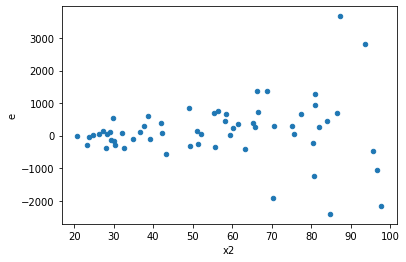

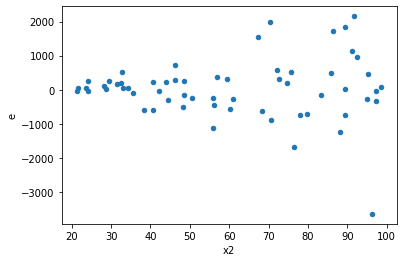

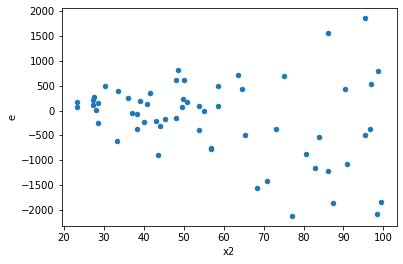

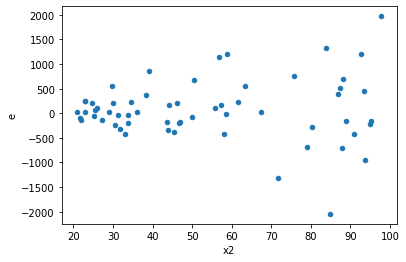

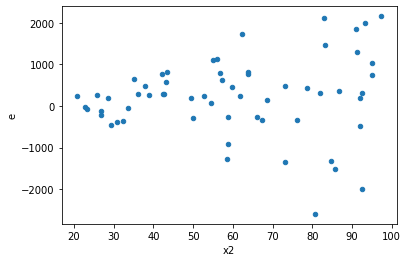

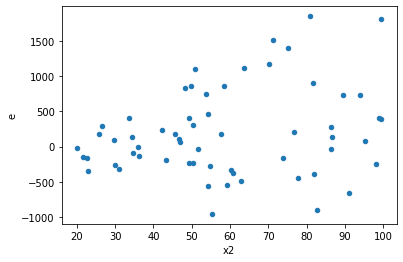

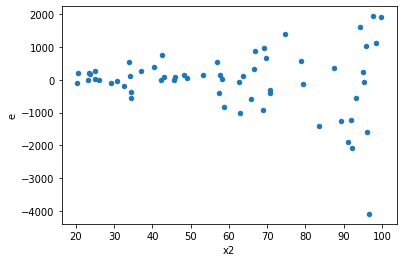

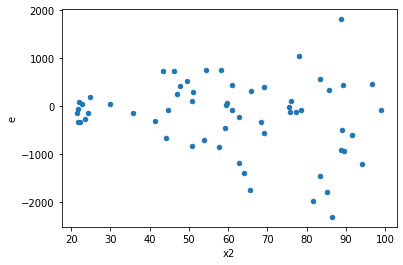

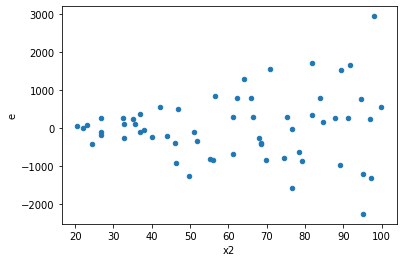

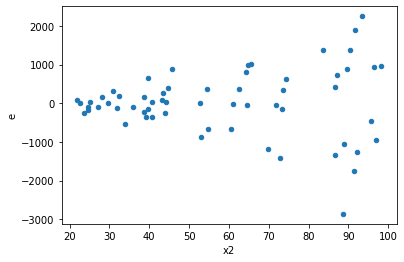

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,32.0,6288505.324294642,34552347.396258116,314425.2662147321,1079760.8561330661,3.434077894349812,0.0018538484387693455,0.9990730757806153,0.0009269242193846727,Reject001=0 : Heteroscedasticity
3.0,23.0,29.0,3383954.8483902444,18316368.21255695,147128.47166914106,631598.9038812742,4.292839426087416,0.00029717321220301685,0.9998514133938985,0.00014858660610150842,Reject001=0 : Heteroscedasticity
7.0,34.0,18.0,14692787.760871354,16960893.0667271,432140.8164962163,942271.8370403945,2.180474051676729,0.08182347715700566,0.9590882614214972,0.04091173857850283,Reject001=1 : Homoscedasticity
8.0,21.0,31.0,2441358.0342250364,39949278.683443606,116255.1444869065,1288686.4091433422,11.084983936246223,6.718904987934593e-09,0.9999999966405475,3.3594524939672965e-09,Reject001=0 : Heteroscedasticity
10.0,31.0,21.0,11672308.755219558,8992783.059363931,376526.0888780503,428227.7647316158,1.1373123334099453,0.7705815057999692,0.6147092471000154,0.3852907528999846,Reject001=1 : Homoscedasticity
11.0,33.0,19.0,17470934.11629381,12868891.375276983,529422.2459482973,677310.0723829991,1.2793381418451848,0.5789369169488299,0.7105315415255851,0.28946845847441494,Reject001=1 : Homoscedasticity
12.0,28.0,24.0,16034157.546745133,31138699.53248832,572648.4838123262,1297445.81385368,2.2656932665151195,0.045342837877548225,0.9773285810612259,0.022671418938774113,Reject001=1 : Homoscedasticity
13.0,18.0,34.0,3376607.183647417,13404590.355075974,187589.28798041205,394252.6575022345,2.1016800146040433,0.06066334165101317,0.9696683291744934,0.030331670825506585,Reject001=1 : Homoscedasticity
15.0,31.0,21.0,3231870.7391611086,43425744.139358275,104253.89481164867,2067892.5780646796,19.8351589818362,1.401594840189091e-09,0.9999999992992026,7.007974200945455e-10,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,32.0,6288505.324294642,34552347.396258116,314425.2662147321,1079760.8561330661,3.434077894349812,0.0018538484387693455,Reject001=0 : Heteroscedasticity
1.0,22.0,30.0,22617908.721938387,14940825.029165015,1028086.7600881085,498027.5009721672,0.4844216658616297,0.0822885999278924,Reject001=1 : Homoscedasticity
2.0,21.0,31.0,27161317.2341612,4616919.86227833,1293396.058769581,148932.89878317193,0.11514871857956109,3.07104777231658e-06,Reject001=0 : Heteroscedasticity
3.0,23.0,29.0,3383954.8483902444,18316368.21255695,147128.47166914106,631598.9038812742,4.292839426087416,0.00029717321220301685,Reject001=0 : Heteroscedasticity
4.0,25.0,27.0,33279436.66044787,14834329.547000432,1331177.4664179147,549419.6128518679,0.41273205617753533,0.029142882310173743,Reject001=1 : Homoscedasticity
5.0,25.0,27.0,13608199.428435681,5480301.258448267,544327.9771374273,202974.12068326917,0.3728893777437127,0.01542615420247384,Reject001=1 : Homoscedasticity
6.0,24.0,28.0,24203919.46919315,18506509.304891743,1008496.6445497145,660946.7608889908,0.6553782448964897,0.2964141469514881,Reject001=1 : Homoscedasticity
7.0,34.0,18.0,14692787.760871354,16960893.0667271,432140.8164962163,942271.8370403945,2.180474051676729,0.08182347715700566,Reject001=1 : Homoscedasticity
8.0,21.0,31.0,2441358.0342250364,39949278.683443606,116255.1444869065,1288686.4091433422,11.084983936246223,6.718904987934593e-09,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      647
Reject001=0 : Heteroscedasticity    353
Name: Result_test, dtype: int64